In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in the good guys csv file
good_guys = pd.read_csv('good_guy_results.csv')
bad_guys = pd.read_csv('bad_guy_results.csv')

print(good_guys.head())
print(bad_guys.head())

good_guys.columns


   Good Guy ID    Bank  Defense Level     Strategy Last Action  Attack Count  \
0            0    28.0            397      analyst     defense            11   
1            1  1760.0            197       random     defense           621   
2            2    10.0              0      copycat       money          1873   
3            3  1330.0            267  two_one_two     defense             8   
4            4  1330.0            267  two_one_two     defense             5   

   Turns  
0    400  
1    400  
2    400  
3    400  
4    400  
   Bad Guy ID          Bank  Attack Level     Strategy Last Action  Steals  \
0           0  19130.592000           189       random       steal     211   
1           1      1.733184           133  attack_poor       steal     267   
2           2  28817.588000           194       random    research     206   
3           3   7953.934400           200      one-one    research     200   
4           4  27846.482000           178       random    resea

Index(['Good Guy ID', 'Bank', 'Defense Level', 'Strategy', 'Last Action',
       'Attack Count', 'Turns'],
      dtype='object')

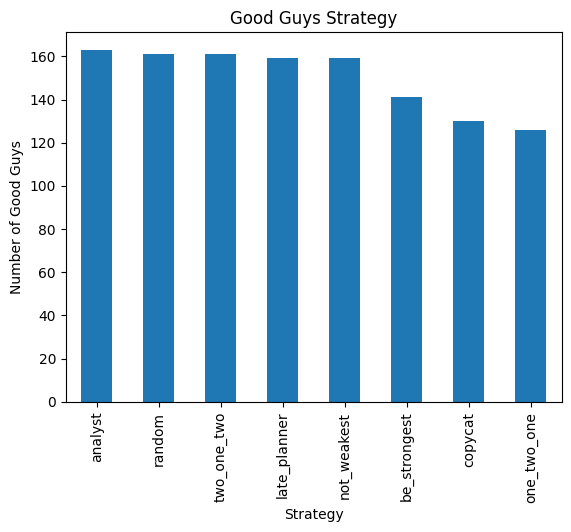

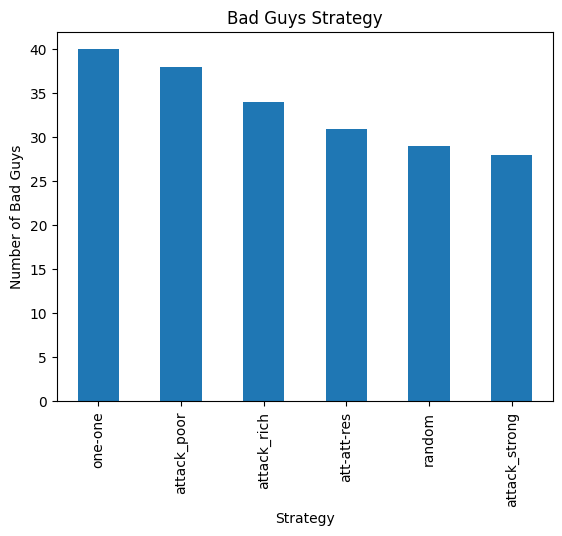

In [3]:
#Count the number of good guys using each strategy
good_guys['Strategy'].value_counts()

#Count the number of bad guys using each strategy
bad_guys['Strategy'].value_counts()

#Plot the number of good guys using each strategy
good_guys['Strategy'].value_counts().plot(kind='bar')
plt.title('Good Guys Strategy')
plt.xlabel('Strategy')
plt.ylabel('Number of Good Guys')
plt.show()

#Plot the number of bad guys using each strategy
bad_guys['Strategy'].value_counts().plot(kind='bar')
plt.title('Bad Guys Strategy')
plt.xlabel('Strategy')
plt.ylabel('Number of Bad Guys')
plt.show()



In [4]:
#Using the good guy 'Strategy' column, find the strategy that results in the highest average 'Bank'
print(good_guys.groupby('Strategy')['Bank'].mean().sort_values(ascending=False))

#Using the bad guy 'Strategy' column, find the strategy that results in the highest average 'Bank'
print(bad_guys.groupby('Strategy')['Bank'].mean().sort_values(ascending=False))


Strategy
two_one_two     1328.995031
random          1013.529767
not_weakest      701.635220
one_two_one      531.084592
copycat          129.153846
analyst           43.652043
late_planner      20.515723
be_strongest      10.070922
Name: Bank, dtype: float64
Strategy
random           26707.842355
att-att-res       7812.465538
one-one           5543.723237
attack_rich       3764.319856
attack_strong     3409.284469
attack_poor          0.261481
Name: Bank, dtype: float64


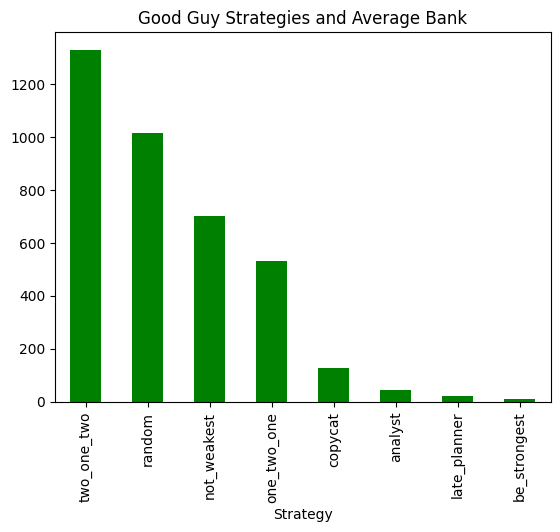

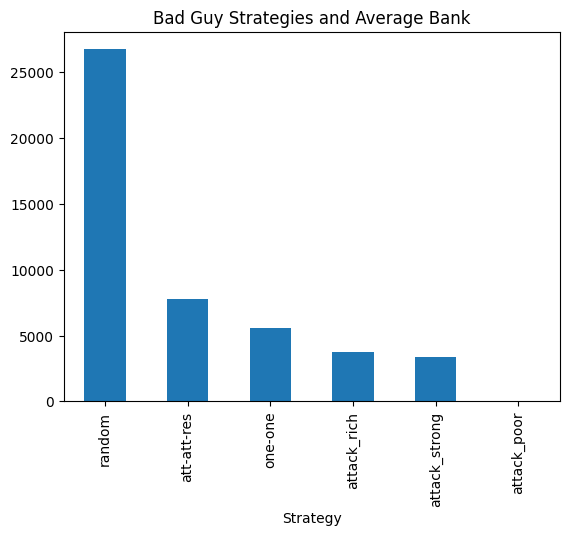

In [16]:
#Graph most successful good guy strategies and their average bank
good_guys.groupby('Strategy')['Bank'].mean().sort_values(ascending=False).plot(kind='bar', title='Good Guy Strategies and Average Bank', color = 'g')
plt.show()

#Graph most successful bad guy strategies and their average bank
bad_guys.groupby('Strategy')['Bank'].mean().sort_values(ascending=False).plot(kind='bar', title='Bad Guy Strategies and Average Bank')
plt.show()


In [6]:
#Using the good guy 'Strategy' column, find the strategy that results in the highest average 'Bank'
print(good_guys.groupby('Strategy')['Defense Level'].mean().sort_values(ascending=False))

#Using the bad guy 'Strategy' column, find the strategy that results in the highest average 'Bank'
print(bad_guys.groupby('Strategy')['Attack Level'].mean().sort_values(ascending=False))


Strategy
be_strongest    398.992908
late_planner    397.081761
analyst         393.380368
two_one_two     267.000000
random          198.409938
one_two_one     133.000000
not_weakest       1.000000
copycat           0.184615
Name: Defense Level, dtype: float64
Strategy
random           201.034483
one-one          200.000000
att-att-res      133.000000
attack_poor      133.000000
attack_rich      133.000000
attack_strong    133.000000
Name: Attack Level, dtype: float64


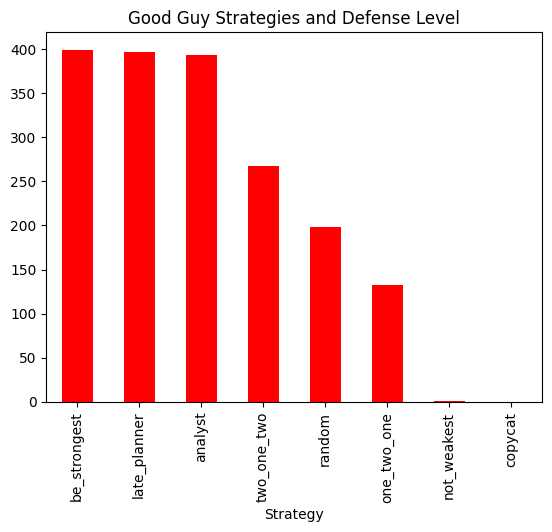

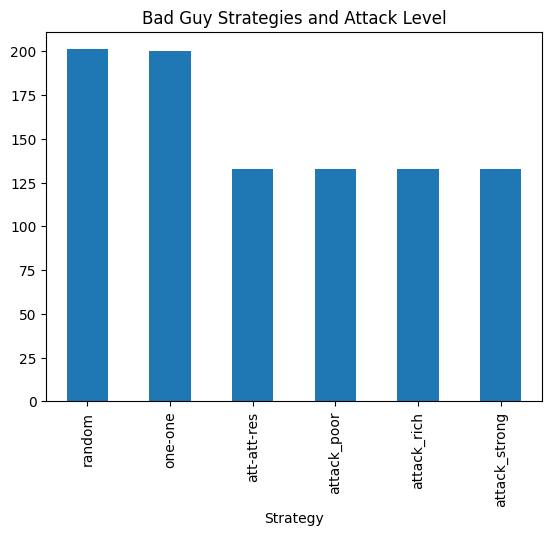

In [17]:
#Graph good guy strategies and their average defense level
good_guys.groupby('Strategy')['Defense Level'].mean().sort_values(ascending=False).plot(kind='bar', title='Good Guy Strategies and Defense Level', color = 'r')
plt.show()

#Graph bad guy strategies and their average bank
bad_guys.groupby('Strategy')['Attack Level'].mean().sort_values(ascending=False).plot(kind='bar', title='Bad Guy Strategies and Attack Level')
plt.show()

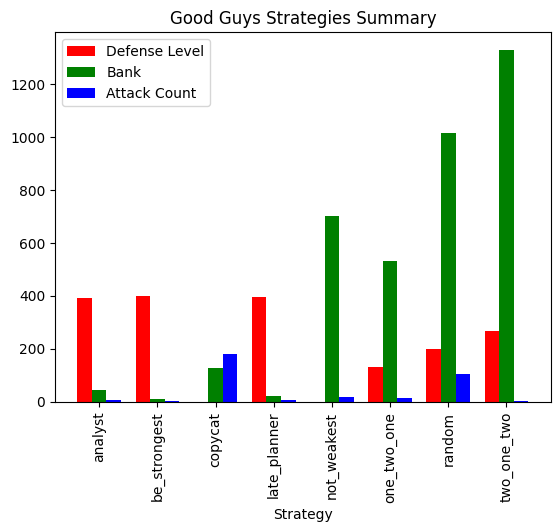

In [49]:
# Good guy strategy summary
N = 8
ind = np.arange(N)
width = 0.25

xvals = good_guys.groupby('Strategy')['Defense Level'].mean().sort_index()
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = good_guys.groupby('Strategy')['Bank'].mean().sort_index()
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = good_guys.groupby('Strategy')['Attack Count'].mean().sort_index()
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Strategy")
plt.title("Good Guys Strategies Summary")

plt.xticks(ind+width,['analyst', 'be_strongest', 'copycat', 'late_planner', 'not_weakest', 'one_two_one', 'random', 'two_one_two'], rotation=90)
plt.legend( (bar1, bar2, bar3), ('Defense Level', 'Bank', 'Attack Count') )
plt.show()

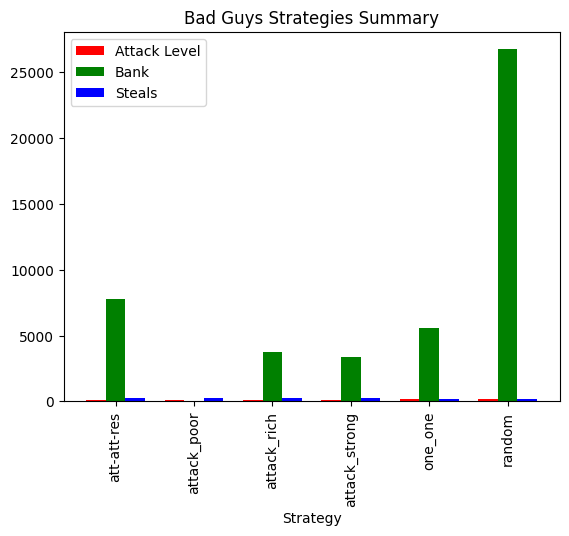

In [44]:
# Bad guy strategies summary
N = 6
ind = np.arange(N)
width = 0.25

xvals = bad_guys.groupby('Strategy')['Attack Level'].mean().sort_index()
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = bad_guys.groupby('Strategy')['Bank'].mean().sort_index()
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = bad_guys.groupby('Strategy')['Steals'].mean().sort_index()
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Strategy")
plt.title("Bad Guys Strategies Summary")

plt.xticks(ind+width,['att-att-res', 'attack_poor', 'attack_rich', 'attack_strong', 'one_one', 'random'], rotation=90)
plt.legend( (bar1, bar2, bar3), ('Attack Level', 'Bank', 'Steals') )
plt.show()